## _Loading Data: Different Ways_

In [1]:
import sys, os, glob, yaml

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pprint
import seaborn as sns
import trackml.dataset

In [4]:
import torch
from torch_geometric.data import Data
import itertools

In [5]:
# append parent dir
sys.path.append('..')

In [6]:
# local imports
from src import Compose_Event, Draw_Compose_Event

## _Input Data_

In [7]:
# mu- data (old)
# input_dir = './data_sets/pandaml/data_3.0_7.0_GeV/'

# mu+mu- data (current)
input_dir = '../data_all'

# pbarp data (coming)
# input_dir = os.environ['HOME']+'/current/2_deepana/pandaml/data/'

### _(1) - Fetch all Files at Once_

In [8]:
# Find All Input Data Files (hits.csv, cells.csv, particles.csv, truth.csv)
all_files = os.listdir(input_dir)
all_files[:10]

['event0000027514-cells.csv',
 'event0000060389-particles.csv',
 'event0000005065-truth.csv',
 'event0000079113-hits.csv',
 'event0000085937-hits.csv',
 'event0000091118-cells.csv',
 'event0000031083-truth.csv',
 'event0000051717-particles.csv',
 'event0000022670-particles.csv',
 'event0000039744-truth.csv']

In [9]:
# Extract File Prefixes (use e.g. xxx-hits.csv)
suffix = '-hits.csv'
file_prefixes = sorted(os.path.join(input_dir, f.replace(suffix, '')) for f in all_files if f.endswith(suffix))
file_prefixes[:10]

['../data_all/event0000000000',
 '../data_all/event0000000001',
 '../data_all/event0000000002',
 '../data_all/event0000000003',
 '../data_all/event0000000004',
 '../data_all/event0000000005',
 '../data_all/event0000000006',
 '../data_all/event0000000007',
 '../data_all/event0000000008',
 '../data_all/event0000000009']

In [10]:
# number of events
len(file_prefixes)

100000

In [11]:
# OR, Extract File Prefixes (only works if we don't have any additional files e.g. *.root, *.log etc.)
all_events = sorted(np.unique([os.path.join(input_dir, event[:15]) for event in all_files]))
all_events[:10]

['../data_all/event0000000000',
 '../data_all/event0000000001',
 '../data_all/event0000000002',
 '../data_all/event0000000003',
 '../data_all/event0000000004',
 '../data_all/event0000000005',
 '../data_all/event0000000006',
 '../data_all/event0000000007',
 '../data_all/event0000000008',
 '../data_all/event0000000009']

In [12]:
# number of events (in addition to *.csv, *.root and *.log files exists in this dir.)
len(all_events)

100000

In [13]:
event_id = 1

In [14]:
# OR, use event_id to fectch one file from list of all files
event_prefix = file_prefixes[event_id]
print(event_prefix)

../data_all/event0000000001


In [15]:
# load an event
hits, tubes, particles, truth = trackml.dataset.load_event(event_prefix)

# memory usage
mem_bytes = (hits.memory_usage(index=True).sum() 
             + tubes.memory_usage(index=True).sum() 
             + particles.memory_usage(index=True).sum() 
             + truth.memory_usage(index=True).sum())

print('{} memory usage {:.2f} MB'.format(os.path.basename(event_prefix), mem_bytes / 2**20))

event0000000001 memory usage 0.03 MB


In [16]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-7.87217,14.645000,35.0,9,0,7
1,2,-8.74686,15.150000,35.0,9,1,112
2,3,-8.74686,16.160000,35.0,9,2,222
3,4,-9.62154,16.665001,35.0,9,3,339
4,5,-9.62154,17.674999,35.0,9,4,461


In [17]:
tubes.head()

,hit_id,isochrone,depcharge,energyloss,volume_id,layer_id,module_id,skewed,sector_id
0,1,0.312154,8106480.0,8.10648,9,0,7,0,0
1,2,0.243986,4438520.0,4.43852,9,1,112,0,0
2,3,0.227273,12218100.0,12.21810,9,2,222,0,0
3,4,0.326345,4719830.0,4.71983,9,3,339,0,0
4,5,0.112023,12483800.0,12.48380,9,4,461,0,0


In [18]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pdgcode,start_time
0,1,0.0,0.0,0.0,-0.467824,0.843642,-0.308224,1,26,13,0
1,2,0.0,0.0,0.0,-0.295066,0.393566,-0.364931,1,25,13,0
2,3,0.0,0.0,0.0,-0.266403,0.004486,0.150829,1,27,13,0
3,4,0.0,0.0,0.0,0.004641,0.066527,0.119620,1,40,13,0
4,5,0.0,0.0,0.0,0.193790,0.088343,0.188068,1,23,13,0


In [19]:
truth.head()

,hit_id,tx,ty,tz,tpx,tpy,tpz,weight,particle_id
0,1,-8.14818,14.503100,-12.1190,-0.304760,0.592697,-0.481614,1.0,10
1,2,-8.53445,15.258200,-12.7318,-0.302497,0.593937,-0.481471,1.0,10
2,3,-8.94150,16.061899,-13.3825,-0.299945,0.595248,-0.481365,1.0,10
3,4,-9.31965,16.815701,-13.9915,-0.297617,0.596324,-0.481449,1.0,10
4,5,-9.72147,17.625601,-14.6446,-0.295214,0.597517,-0.481419,1.0,10


### _(2) - Fetch a Single Event_

In [20]:
event_id = 1

In [21]:
# Fetch an event, use event_id (int)
prefix = "event{:010d}".format(event_id)                     # OR, 
prefix = str('event{!s}'.format(format(event_id, '010d')))   # a little better
event_prefix = os.path.join(input_dir, prefix)              # event_prefix ~ event_file = input_dir + prefix

In [22]:
# load an event
hits, tubes, particles, truth = trackml.dataset.load_event(event_prefix)

# memory usage
mem_bytes = (hits.memory_usage(index=True).sum() 
             + tubes.memory_usage(index=True).sum() 
             + particles.memory_usage(index=True).sum() 
             + truth.memory_usage(index=True).sum())

print('{} memory usage {:.2f} MB'.format(os.path.basename(event_prefix), mem_bytes / 2**20))


event0000000001 memory usage 0.03 MB


In [23]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-7.87217,14.645000,35.0,9,0,7
1,2,-8.74686,15.150000,35.0,9,1,112
2,3,-8.74686,16.160000,35.0,9,2,222
3,4,-9.62154,16.665001,35.0,9,3,339
4,5,-9.62154,17.674999,35.0,9,4,461


In [24]:
tubes.head()

,hit_id,isochrone,depcharge,energyloss,volume_id,layer_id,module_id,skewed,sector_id
0,1,0.312154,8106480.0,8.10648,9,0,7,0,0
1,2,0.243986,4438520.0,4.43852,9,1,112,0,0
2,3,0.227273,12218100.0,12.21810,9,2,222,0,0
3,4,0.326345,4719830.0,4.71983,9,3,339,0,0
4,5,0.112023,12483800.0,12.48380,9,4,461,0,0


In [25]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pdgcode,start_time
0,1,0.0,0.0,0.0,-0.467824,0.843642,-0.308224,1,26,13,0
1,2,0.0,0.0,0.0,-0.295066,0.393566,-0.364931,1,25,13,0
2,3,0.0,0.0,0.0,-0.266403,0.004486,0.150829,1,27,13,0
3,4,0.0,0.0,0.0,0.004641,0.066527,0.119620,1,40,13,0
4,5,0.0,0.0,0.0,0.193790,0.088343,0.188068,1,23,13,0


In [26]:
truth.head()

,hit_id,tx,ty,tz,tpx,tpy,tpz,weight,particle_id
0,1,-8.14818,14.503100,-12.1190,-0.304760,0.592697,-0.481614,1.0,10
1,2,-8.53445,15.258200,-12.7318,-0.302497,0.593937,-0.481471,1.0,10
2,3,-8.94150,16.061899,-13.3825,-0.299945,0.595248,-0.481365,1.0,10
3,4,-9.31965,16.815701,-13.9915,-0.297617,0.596324,-0.481449,1.0,10
4,5,-9.72147,17.625601,-14.6446,-0.295214,0.597517,-0.481419,1.0,10


## _Detector Layout_

In [28]:
event = Compose_Event(event_prefix, skewed=False)

In [29]:
event.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,isochrone,skewed,sector_id,...,particle_id,vx,vy,vz,q,nhits,pt,ptheta,peta,event_id
0,1,-7.87217,14.645000,35.0,9,0,7,0.312154,0,0,...,10,0.0,0.0,0.0,-1,1,0.666460,2.196559,-0.671120,1
1,30,11.37090,12.625000,35.0,9,0,94,0.445773,0,5,...,8,0.0,0.0,0.0,-1,1,0.223402,1.050394,0.545619,1
2,53,-12.24560,-12.120000,35.0,9,0,41,0.361464,0,2,...,7,0.0,0.0,0.0,-1,1,0.521591,0.422951,1.538581,1
3,79,-2.62406,-17.674999,35.0,9,0,52,0.260180,0,2,...,6,0.0,0.0,0.0,-1,1,1.091397,2.150934,-0.615717,1
4,102,15.74430,10.100000,35.0,9,0,89,0.423630,0,5,...,5,0.0,0.0,0.0,1,1,0.211924,0.861333,0.777773,1


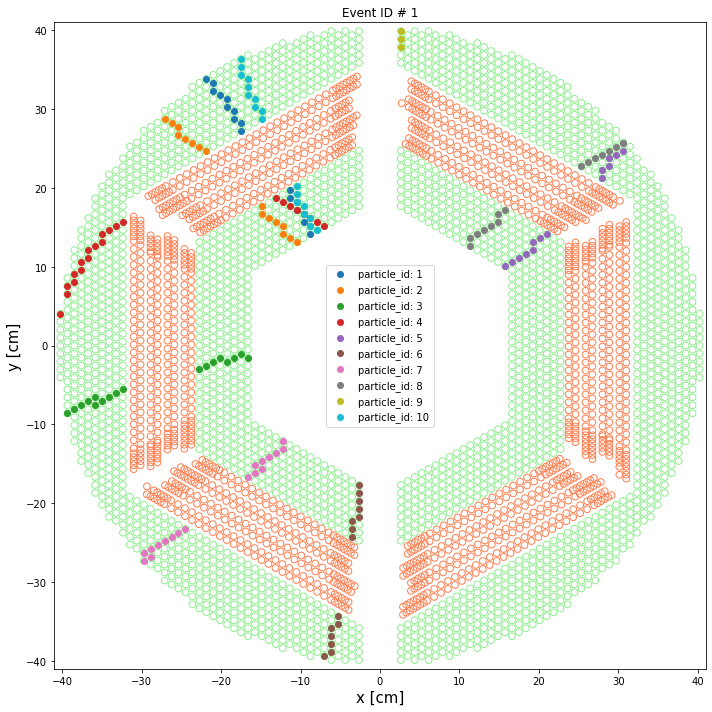

In [31]:
Draw_Compose_Event(event, figsize=(10, 10), save_fig=False);